# Explore heuristic values for an empty maze

In [33]:
if(!"proxy" %in% rownames(installed.packages())) 
    install.packages("proxy", repos="http://cran.us.r-project.org")
library(proxy)

options(digits = 2)

Define an empty $10 \times 10$ maze.

In [41]:
n <- 10
start <- cbind(2, 2)
goal <- cbind(9, 9)

maze <- matrix(" ", nrow = n, ncol = n)
maze[start] <- "S"
maze[goal] <- "G"
print(maze)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [2,] " "  "S"  " "  " "  " "  " "  " "  " "  " "  " "  
 [3,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [4,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [5,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [6,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [7,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [8,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [9,] " "  " "  " "  " "  " "  " "  " "  " "  "G"  " "  
[10,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  


## Use Manhattan Distance for $h(n)$

Manhattan distance is a perfect heuristic for the maze! $h(n) = h^*(n)$ and $f(n) = f^*(n)$ (the asterisk represents the optimal value).

Calculate $h(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   16   15   14   13   12   11   10    9    8     9
 [2,]   15   14   13   12   11   10    9    8    7     8
 [3,]   14   13   12   11   10    9    8    7    6     7
 [4,]   13   12   11   10    9    8    7    6    5     6
 [5,]   12   11   10    9    8    7    6    5    4     5
 [6,]   11   10    9    8    7    6    5    4    3     4
 [7,]   10    9    8    7    6    5    4    3    2     3
 [8,]    9    8    7    6    5    4    3    2    1     2
 [9,]    8    7    6    5    4    3    2    1    0     1
[10,]    9    8    7    6    5    4    3    2    1     2

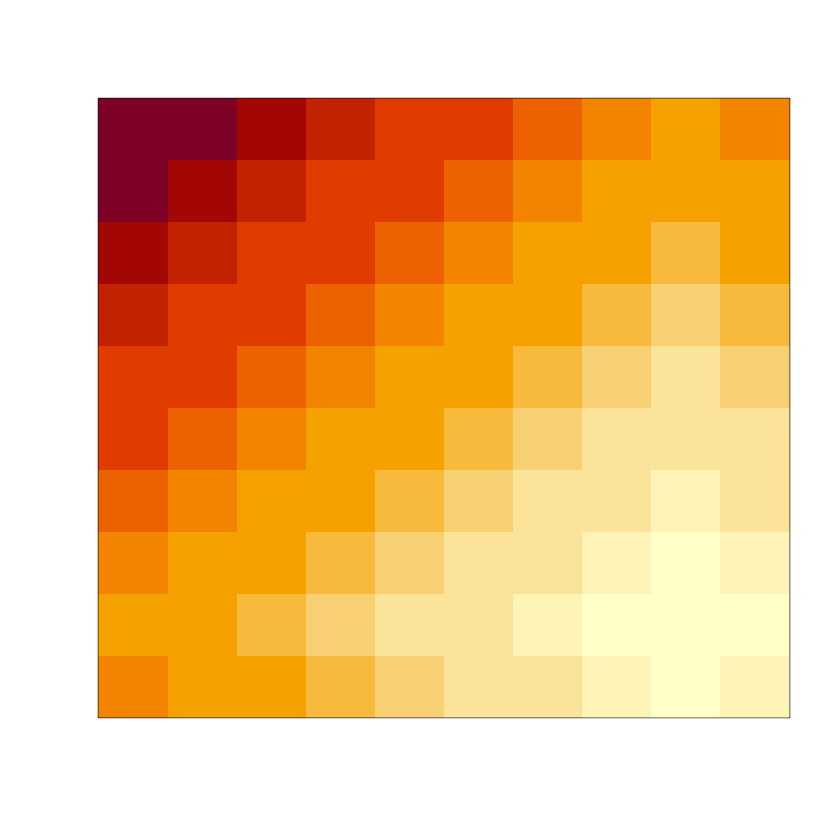

In [35]:
h <- outer(1:n, 1:n, FUN = function(x,y)
  dist(cbind(x,y), goal, method = "manhattan"))
h

image(h[,n:1], xaxt = "n", yaxt = "n")

Calculate $f(n) = h(n) + g(n)$ 

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   18   16   16   16   16   16   16   16   16    18
 [2,]   16   14   14   14   14   14   14   14   14    16
 [3,]   16   14   14   14   14   14   14   14   14    16
 [4,]   16   14   14   14   14   14   14   14   14    16
 [5,]   16   14   14   14   14   14   14   14   14    16
 [6,]   16   14   14   14   14   14   14   14   14    16
 [7,]   16   14   14   14   14   14   14   14   14    16
 [8,]   16   14   14   14   14   14   14   14   14    16
 [9,]   16   14   14   14   14   14   14   14   14    16
[10,]   18   16   16   16   16   16   16   16   16    18

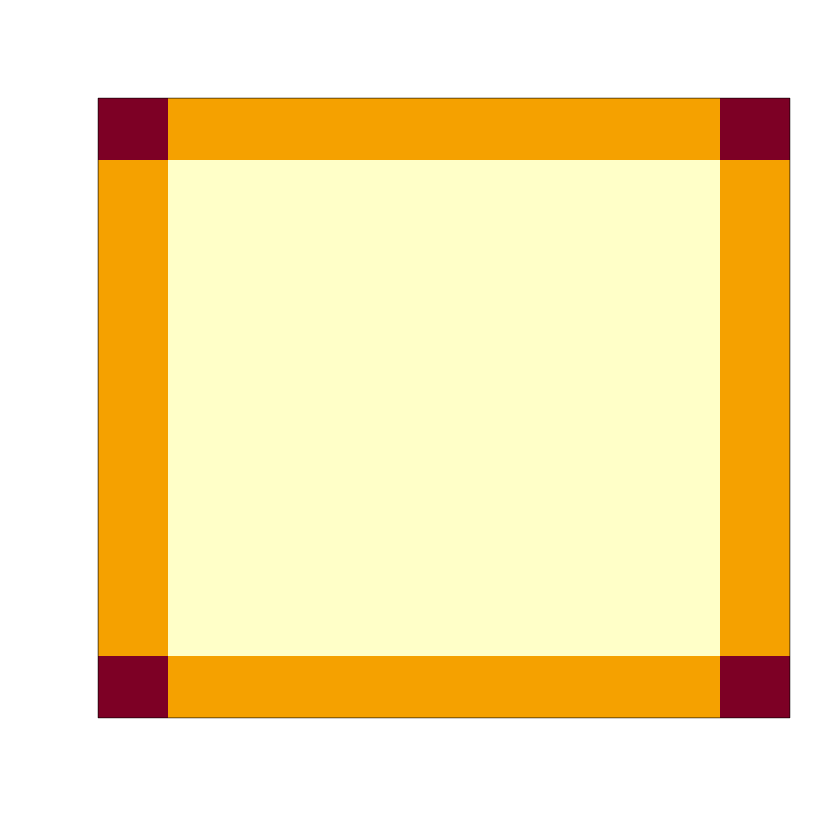

In [36]:
f <- outer(1:n, 1:n, FUN = function(x,y)
  dist(cbind(x,y), goal, method = "manhattan") +
    dist(cbind(x,y), start, method = "manhattan") )
f

image(f[,n:1], xaxt = "n", yaxt = "n")

_Note:_ since the heuristic is perfect, almost all squares have exactly the same $f(n)$ and breaking ties may be important!

## Use Euclidean Distance for $h(n)$

Euclidean distance is not perfect with $h(n) \le h^*(n)$ and $f(n) \le f^*(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 11.3 10.6 10.0  9.4  8.9  8.5  8.2  8.1  8.0   8.1
 [2,] 10.6  9.9  9.2  8.6  8.1  7.6  7.3  7.1  7.0   7.1
 [3,] 10.0  9.2  8.5  7.8  7.2  6.7  6.3  6.1  6.0   6.1
 [4,]  9.4  8.6  7.8  7.1  6.4  5.8  5.4  5.1  5.0   5.1
 [5,]  8.9  8.1  7.2  6.4  5.7  5.0  4.5  4.1  4.0   4.1
 [6,]  8.5  7.6  6.7  5.8  5.0  4.2  3.6  3.2  3.0   3.2
 [7,]  8.2  7.3  6.3  5.4  4.5  3.6  2.8  2.2  2.0   2.2
 [8,]  8.1  7.1  6.1  5.1  4.1  3.2  2.2  1.4  1.0   1.4
 [9,]  8.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  0.0   1.0
[10,]  8.1  7.1  6.1  5.1  4.1  3.2  2.2  1.4  1.0   1.4

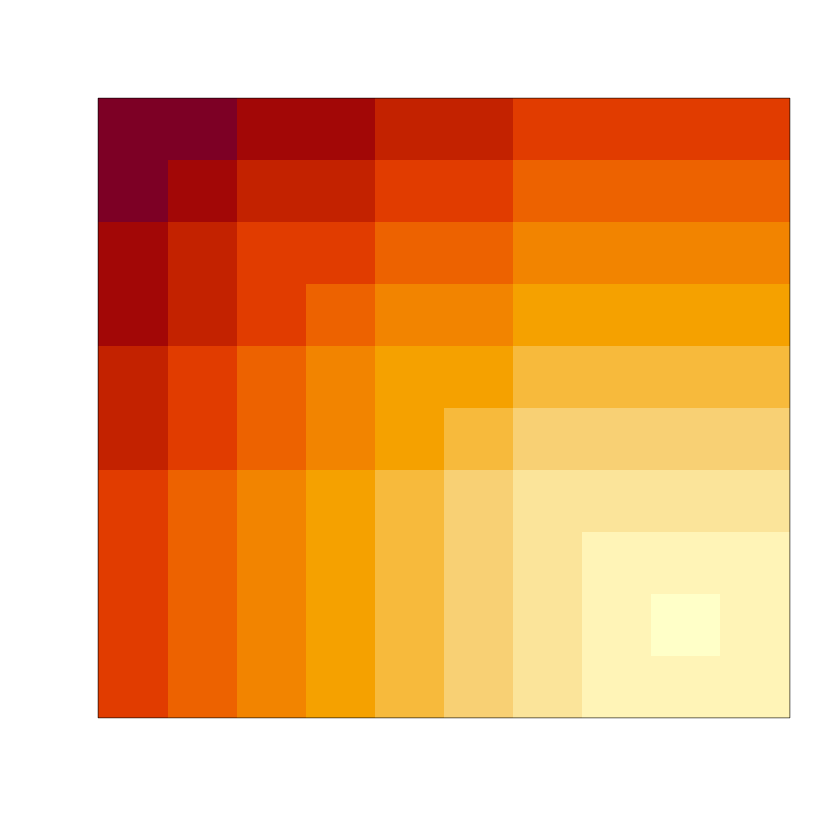

In [37]:
h <- outer(1:n, 1:n, FUN = function(x,y)
  dist(cbind(x,y), goal, method = "euclidean"))
h

image(h[,n:1], xaxt = "n", yaxt = "n")

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 13.3 11.6 12.0 12.4 12.9 13.5 14.2 15.1 16.0  17.1
 [2,] 11.6  9.9 10.2 10.6 11.1 11.6 12.3 13.1 14.0  15.1
 [3,] 12.0 10.2 10.5 10.8 11.2 11.7 12.3 13.1 14.0  15.1
 [4,] 12.4 10.6 10.8 11.1 11.4 11.8 12.4 13.1 14.0  15.1
 [5,] 12.9 11.1 11.2 11.4 11.7 12.0 12.5 13.1 14.0  15.1
 [6,] 13.5 11.6 11.7 11.8 12.0 12.2 12.6 13.2 14.0  15.2
 [7,] 14.2 12.3 12.3 12.4 12.5 12.6 12.8 13.2 14.0  15.2
 [8,] 15.1 13.1 13.1 13.1 13.1 13.2 13.2 13.4 14.0  15.4
 [9,] 16.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0  16.0
[10,] 17.1 15.1 15.1 15.1 15.1 15.2 15.2 15.4 16.0  17.4

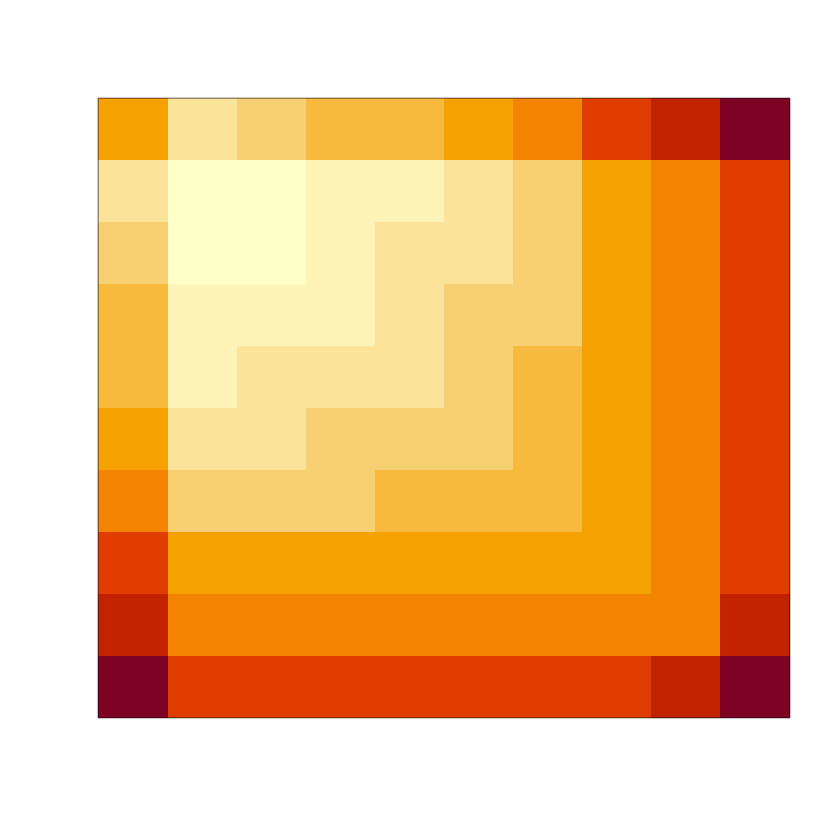

In [38]:
f <- outer(1:n, 1:n, FUN = function(x,y)
  dist(cbind(x,y), goal, method = "euclidean") +
    dist(cbind(x,y), start, method = "manhattan") )
f

image(f[,n:1], xaxt = "n", yaxt = "n")